### Yelp dataset recommender system Otto Tagapere and Matthijs Snijders

Otto Tagapere was responsible for content based user and item - knn and for item collaborative
Matthijs Snijders was responsible for content based user and item knn and for user collaborative

The packages are imported

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
import seaborn as sns

The merged yelp parquet file is loaded in

In [2]:
# Read the parquet file
df = pd.read_parquet(r"C:\Users\matth\Desktop\Master\SDM\yelp_dataset\merged_df_yelp.parquet")

# Display the dataframe
print(df)

                    business_id                      name  \
0        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
2        mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
3        mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
4        tUFrWirKiKi_TAnsVWINQQ                    Target   
...                         ...                       ...   
1698743  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
1698744  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
1698745  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
1698746  jV_XOycEzSlTx-65W906pg                   Sic Ink   
1698747  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                 address           city state postal_code  \
0                 1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1                 1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
2        87 Grasso Plaza Shopping Ce

Basic EDA is done to gain better insights into the dataframe

In [3]:
df.isnull().sum()


business_id          0
name                 0
address              0
city                 0
state                0
postal_code          0
latitude             0
longitude            0
stars                0
review_count         0
is_open              0
attributes       64324
categories         326
hours           126104
user_id         300692
source               0
dtype: int64

In [4]:
print(df.shape)


(1698748, 16)


Getting the descriptive statistics of the dataframe

In [5]:
#Seeing descriptive statistics of the dataframe
df.describe()


,latitude,longitude,stars,review_count,is_open
count,1.698748e+06,1.698748e+06,1.698748e+06,1.698748e+06,1.698748e+06
mean,3.607673e+01,-8.965580e+01,3.723839e+00,3.108824e+02,8.227518e-01
std,5.445223e+00,1.488475e+01,8.000754e-01,6.788686e+02,3.818787e-01
min,2.755513e+01,-1.200951e+02,1.000000e+00,5.000000e+00,0.000000e+00
25%,2.997423e+01,-9.031297e+01,3.500000e+00,2.500000e+01,1.000000e+00
50%,3.861722e+01,-8.616055e+01,4.000000e+00,9.400000e+01,1.000000e+00
75%,3.994620e+01,-7.547755e+01,4.500000e+00,2.960000e+02,1.000000e+00
max,5.367920e+01,-7.320046e+01,5.000000e+00,7.568000e+03,1.000000e+00


This graph shows the distribution of stars

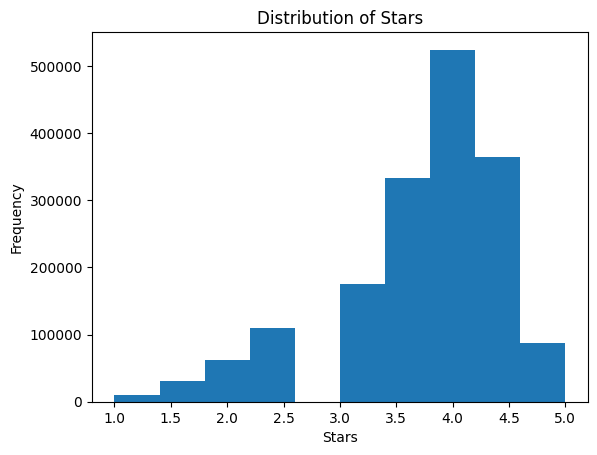

stars
4.0    524386
4.5    363840
3.5    333244
3.0    175946
2.5    109856
5.0     88144
2.0     62582
1.5     31148
1.0      9602
Name: count, dtype: int64

In [6]:
#Checking for the distribution of the stars variable
plt.hist(df['stars'])
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.title('Distribution of Stars')
plt.show()
df['stars'].value_counts()


Check which user have given the most reviews

In [7]:
#Checking which users have given the most reviews
df['user_id'].value_counts()

user_id
_BcWyKQL16ndpBdggh2kNA    664
0Igx-a1wAstiBDerGxXk2A    368
-G7Zkl1wIWBBmD0KRy_sCw    356
Xw7ZjaGfr0WNVt6s_5KZfA    336
ET8n-r7glWYqZhuR6GcdNw    332
                         ... 
GhIlS_ZuzRihcExhLQF3_g      2
TdHEZwZMXNaVeqGv4H0_yw      2
ykSkemH79OPOT1h4_JDicw      2
Um0JKNwpqu46k7pa6QORwg      2
I3AdCf0PlwJa5tUIlrKHqQ      2
Name: count, Length: 425544, dtype: int64

Look at the categories

In [8]:
(df['categories'])

0          Doctors, Traditional Chinese Medicine, Naturop...
1          Doctors, Traditional Chinese Medicine, Naturop...
2          Shipping Centers, Local Services, Notaries, Ma...
3          Shipping Centers, Local Services, Notaries, Ma...
4          Department Stores, Shopping, Fashion, Home & G...
                                 ...                        
1698743    Fitness/Exercise Equipment, Eyewear & Optician...
1698744    Fitness/Exercise Equipment, Eyewear & Optician...
1698745    Fitness/Exercise Equipment, Eyewear & Optician...
1698746    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
1698747    Beauty & Spas, Permanent Makeup, Piercing, Tattoo
Name: categories, Length: 1698748, dtype: object

Look at the attributes

In [9]:
(df['attributes'])


0          {'AcceptsInsurance': None, 'AgesAllowed': None...
1          {'AcceptsInsurance': None, 'AgesAllowed': None...
2          {'AcceptsInsurance': None, 'AgesAllowed': None...
3          {'AcceptsInsurance': None, 'AgesAllowed': None...
4          {'AcceptsInsurance': None, 'AgesAllowed': None...
                                 ...                        
1698743    {'AcceptsInsurance': None, 'AgesAllowed': None...
1698744    {'AcceptsInsurance': None, 'AgesAllowed': None...
1698745    {'AcceptsInsurance': None, 'AgesAllowed': None...
1698746    {'AcceptsInsurance': None, 'AgesAllowed': None...
1698747    {'AcceptsInsurance': None, 'AgesAllowed': None...
Name: attributes, Length: 1698748, dtype: object

This code snippet prints the number of unique values present in the 'categories' column of the DataFrame df

In [10]:
print(df['categories'].nunique())


83160


Print out the columns that are in the data frame

In [11]:
print(df.columns)


Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'user_id', 'source'],
      dtype='object')



This part of the code converts the values in the 'attributes' column of the DataFrame df from dictionaries to JSON strings using the json.dumps() function.



In [12]:
import json

# Convert dictionary values to JSON strings
df['attributes'] = df['attributes'].apply(lambda x: json.dumps(x))


This code snippet prints the number of unique values present in the 'attributes' column of the DataFrame df

In [13]:
print(df['attributes'].nunique())

67213


Print out the city and state

In [14]:
print(df['city'])
print(df['state'])

0          Santa Barbara
1          Santa Barbara
2                 Affton
3                 Affton
4                 Tucson
               ...      
1698743     Edwardsville
1698744     Edwardsville
1698745     Edwardsville
1698746     Apollo beach
1698747     Apollo beach
Name: city, Length: 1698748, dtype: object
0          CA
1          CA
2          MO
3          MO
4          AZ
           ..
1698743    IL
1698744    IL
1698745    IL
1698746    FL
1698747    FL
Name: state, Length: 1698748, dtype: object


print out the uniue city and state

In [15]:
print(df['city'].nunique())
print(df['state'].nunique())

1416
27


Display a heatmeat that shows the correlation of different columns

<Axes: >

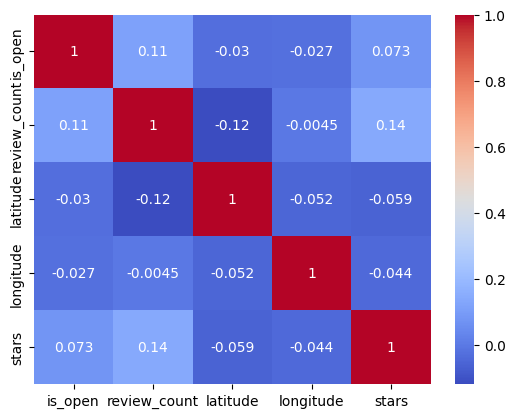

In [16]:
#Select the columns of interest
columns_of_interest = ['is_open', 'review_count', 'latitude','longitude', 'stars']

#Create a correlation matrix
correlation_matrix = df[columns_of_interest].corr()

# Create a heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')


This code snippet creates a new column 'rating' in the DataFrame df, based on the values in the 'stars' column. Ratings are categorized as 'low', 'medium', or 'high' according to specific thresholds.



In [17]:
df['rating'] = df['stars'].apply(lambda x: 'low' if x <= 2.5 else 'medium' if x > 2.5 and x <= 3.5 else 'high')

This code snippet splits the values in the 'categories' column of the DataFrame df based on commas and assigns each split value to its own column.



In [18]:
# Split categories column on a comma and put each split into its own column
df_categories = df['categories'].str.split(',', expand=True)

# Rename the columns
df_categories.columns = [f'category_{i+1}' for i in range(df_categories.shape[1])]

# Concatenate the original DataFrame with the new columns
df = pd.concat([df, df_categories], axis=1)

# Display the updated DataFrame
print(df)

                    business_id                      name  \
0        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
1        Pns2l4eNsfO8kk83dixA6A  Abby Rappoport, LAC, CMQ   
2        mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
3        mpf3x-BjTdTEA3yCZrAYPw             The UPS Store   
4        tUFrWirKiKi_TAnsVWINQQ                    Target   
...                         ...                       ...   
1698743  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
1698744  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
1698745  mtGm22y5c2UHNXDFAjaPNw  Cyclery & Fitness Center   
1698746  jV_XOycEzSlTx-65W906pg                   Sic Ink   
1698747  jV_XOycEzSlTx-65W906pg                   Sic Ink   

                                 address           city state postal_code  \
0                 1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
1                 1616 Chapala St, Ste 2  Santa Barbara    CA       93101   
2        87 Grasso Plaza Shopping Ce

Print out the dataframe columns

In [19]:
df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'user_id', 'source', 'rating',
       'category_1', 'category_2', 'category_3', 'category_4', 'category_5',
       'category_6', 'category_7', 'category_8', 'category_9', 'category_10',
       'category_11', 'category_12', 'category_13', 'category_14',
       'category_15', 'category_16', 'category_17', 'category_18',
       'category_19', 'category_20', 'category_21', 'category_22',
       'category_23', 'category_24', 'category_25', 'category_26',
       'category_27', 'category_28', 'category_29', 'category_30',
       'category_31', 'category_32', 'category_33', 'category_34',
       'category_35', 'category_36'],
      dtype='object')

Display the entire dataframe

In [20]:
df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,category_27,category_28,category_29,category_30,category_31,category_32,category_33,category_34,category_35,category_36
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,None,None,None,None,None,None,None,None,None,None
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,None,None,None,None,None,None,None,None,None,None
2,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,None,None,None,None,None,None,None,None,None,None
3,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,None,None,None,None,None,None,None,None,None,None
4,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698743,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,None,None,None,None,None,None,None,None,None,None
1698744,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,None,None,None,None,None,None,None,None,None,None
1698745,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,None,None,None,None,None,None,None,None,None,None
1698746,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,...,None,None,None,None,None,None,None,None,None,None


Create Mapping Dictionary for Business IDs
This code snippet creates a mapping dictionary (`train_business_id_mapping`) to map unique business IDs to integer values for the `train_data` DataFrame.



In [21]:
# Create a mapping dictionary to map unique business IDs to integer values for train_data
unique_train_business_ids = df['business_id'].unique()
train_business_id_mapping = {business_id: i + 1 for i, business_id in enumerate(unique_train_business_ids)}

# Map the business IDs to integer values and create a new column 'int_business_id' in train_data
df['int_business_id'] = df['business_id'].map(train_business_id_mapping)

df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,category_28,category_29,category_30,category_31,category_32,category_33,category_34,category_35,category_36,int_business_id
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,None,None,None,None,None,None,None,None,None,1
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,None,None,None,None,None,None,None,None,None,1
2,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,None,None,None,None,None,None,None,None,None,2
3,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,None,None,None,None,None,None,None,None,None,2
4,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,None,None,None,None,None,None,None,None,None,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698743,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,None,None,None,None,None,None,None,None,None,150345
1698744,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,None,None,None,None,None,None,None,None,None,150345
1698745,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,None,None,None,None,None,None,None,None,None,150345
1698746,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,...,None,None,None,None,None,None,None,None,None,150346


Create Mapping Dictionary for User IDs
This code snippet creates a mapping dictionary (`train_user_id_mapping`) to map unique user IDs to integer values for the `train_data` DataFrame.



In [22]:
# Create a mapping dictionary to map unique user IDs to integer values for train_data
unique_train_user_ids = df['user_id'].unique()
train_user_id_mapping = {user_id: i + 1 for i, user_id in enumerate(unique_train_user_ids)}

# Map the user IDs to integer values and create a new column 'int_user_id' in train_data
df['int_user_id'] = df['user_id'].map(train_user_id_mapping)

df


,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,category_29,category_30,category_31,category_32,category_33,category_34,category_35,category_36,int_business_id,int_user_id
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,None,None,None,None,None,None,None,None,1,1
1,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,...,None,None,None,None,None,None,None,None,1,1
2,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,None,None,None,None,None,None,None,None,2,1
3,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,...,None,None,None,None,None,None,None,None,2,1
4,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,...,None,None,None,None,None,None,None,None,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1698743,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,None,None,None,None,None,None,None,None,150345,34385
1698744,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,None,None,None,None,None,None,None,None,150345,425544
1698745,mtGm22y5c2UHNXDFAjaPNw,Cyclery & Fitness Center,2472 Troy Rd,Edwardsville,IL,62025,38.782351,-89.950558,4.0,24,...,None,None,None,None,None,None,None,None,150345,425545
1698746,jV_XOycEzSlTx-65W906pg,Sic Ink,238 Apollo Beach Blvd,Apollo beach,FL,33572,27.771002,-82.394910,4.5,9,...,None,None,None,None,None,None,None,None,150346,1


Calculate Average Stars by User
This code snippet calculates the average stars given by each user and merges the results with the original DataFrame `df` based on the 'user_id' column.



In [23]:
# Calculate average stars for each user
average_stars = df.groupby('user_id')['stars'].mean().reset_index()

# Merge average_stars with subsample_df based on user_id
df = pd.merge(df, average_stars, on='user_id', suffixes=('', '_avg'))

# Rename the newly added column to represent it's the average stars
df.rename(columns={'stars_avg': 'average_stars_by_user'}, inplace=True)

# Display the new column 'average_stars_by_user'
print(df['average_stars_by_user'])

0          3.645161
1          3.645161
2          3.645161
3          3.645161
4          3.645161
             ...   
1398051    4.000000
1398052    4.000000
1398053    4.000000
1398054    4.000000
1398055    4.000000
Name: average_stars_by_user, Length: 1398056, dtype: float64


Stratified Subsampling for Balanced Class Distribution
This code snippet performs stratified subsampling to create a subsample DataFrame (`subsample_df`) with a balanced class distribution based on the 'stars' column.



Reason for Choosing Sample Size
The sample size of 15,000 was chosen to ensure a sufficiently large dataset for training while maintaining a balanced class distribution. This size strikes a balance between having enough data to capture the diversity of the dataset and avoiding computational overhead. It allows for robust model training without compromising the representativeness of the classes.



In [24]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Calculate class distribution
class_distribution = df['stars'].value_counts(normalize=True)

# Determine the size of subsample
subsample_size = 15000  # Specify the desired size of the subsample

# Create a DataFrame to store the stratified subsample
subsample_df = pd.DataFrame()

# Iterate over each class and perform stratified subsampling
for class_label, proportion in class_distribution.items():
    # Calculate the number of samples to draw for this class
    num_samples = int(proportion * subsample_size)
    
    # Filter data for the current class
    class_data = df[df['stars'] == class_label]
    
    # Perform stratified subsampling for the current class
    class_subsample = class_data.sample(n=num_samples, replace=True)
    
    # Append the subsample to the overall stratified subsample DataFrame
    subsample_df = pd.concat([subsample_df, class_subsample], ignore_index=True)

# Print the class distribution in the subsample
print("Class distribution in subsample:")
print(subsample_df['stars'].value_counts())

Class distribution in subsample:
stars
4.0    4958
4.5    3320
3.5    3006
3.0    1491
2.5     871
5.0     595
2.0     467
1.5     228
1.0      60
Name: count, dtype: int64


Train-Validation-Test Split
This code snippet splits the subsample DataFrame (`subsample_df`) into train, validation, and test sets, ensuring a balanced class distribution for each set.



In [25]:
from sklearn.model_selection import train_test_split

# Split the data into train and test/validation sets
train_val_data, test_data = train_test_split(subsample_df, test_size=0.2, stratify=subsample_df['stars'], random_state=42)

# Split the train and validation sets
train_data, val_data = train_test_split(train_val_data, test_size=0.2, stratify=train_val_data['stars'], random_state=42)

# Print the sizes of each set
print("Train set size:", len(train_data))
print("Validation set size:", len(val_data))
print("Test set size:", len(test_data))

Train set size: 9596
Validation set size: 2400
Test set size: 3000


Extract Postal Code Components
This code snippet extracts numerical and alphabetical components from the 'postal_code' column of the `subsample_df` DataFrame and creates two new columns: 'postal_code_number' for numerical components and 'postal_code_letter' for alphabetical components.



In [26]:
subsample_df['postal_code_number'] = subsample_df['postal_code'].str.extract(r'(\d+)')
subsample_df['postal_code_letter'] = subsample_df['postal_code'].str.extract(r'([a-zA-Z]+)')

# Displaying the updated DataFrame
print(subsample_df.head())


              business_id                              name  \
0  3YqUe2FTCQr0pPVK8oCv6Q               Columbia Restaurant   
1  EQP8f7Rq5KXknJixlwxZEw                   Salt Rock Grill   
2  9Ue0NTSsStu85mxuv-qMtQ                         Fired Pie   
3  L_Rwy6oSAnMUY3NCDspxmA              The Good King Tavern   
4  KLw1CW87qo3Fw4i9vuietg  Roxborough Shoe & Luggage Repair   

                    address           city state postal_code   latitude  \
0            2117 E 7th Ave          Tampa    FL       33605  27.960006   
1           19325 Gulf Blvd  Indian Shores    FL       33785  27.848504   
2  350 E Congress St, Ste D         Tucson    AZ       85701  32.221603   
3              614 S 7th St   Philadelphia    PA       19147  39.941969   
4            6116 Ridge Ave   Philadelphia    PA       19128  40.033850   

    longitude  stars  review_count  ...  category_32 category_33 category_34  \
0  -82.434904    4.0          2860  ...         None        None        None   
1  -82.842

Display the columns in the subsample_df

In [27]:
subsample_df.columns

Index(['business_id', 'name', 'address', 'city', 'state', 'postal_code',
       'latitude', 'longitude', 'stars', 'review_count', 'is_open',
       'attributes', 'categories', 'hours', 'user_id', 'source', 'rating',
       'category_1', 'category_2', 'category_3', 'category_4', 'category_5',
       'category_6', 'category_7', 'category_8', 'category_9', 'category_10',
       'category_11', 'category_12', 'category_13', 'category_14',
       'category_15', 'category_16', 'category_17', 'category_18',
       'category_19', 'category_20', 'category_21', 'category_22',
       'category_23', 'category_24', 'category_25', 'category_26',
       'category_27', 'category_28', 'category_29', 'category_30',
       'category_31', 'category_32', 'category_33', 'category_34',
       'category_35', 'category_36', 'int_business_id', 'int_user_id',
       'average_stars_by_user', 'postal_code_number', 'postal_code_letter'],
      dtype='object')

Show the datatypes

In [28]:
subsample_df.dtypes

business_id               object
name                      object
address                   object
city                      object
state                     object
postal_code               object
latitude                 float64
longitude                float64
stars                    float64
review_count               int64
is_open                    int64
attributes                object
categories                object
hours                     object
user_id                   object
source                    object
rating                    object
category_1                object
category_2                object
category_3                object
category_4                object
category_5                object
category_6                object
category_7                object
category_8                object
category_9                object
category_10               object
category_11               object
category_12               object
category_13               object
category_1

Reset DataFrame Index
This code snippet resets the index of the DataFrame `subsample_df` after performing operations, ensuring a clean index without any gaps or duplicates.



In [30]:
# Print the 'int_business_id' column in subsample_df
print(subsample_df['int_business_id'])

0         99671
1        109663
2        121259
3        138245
4         15646
          ...  
14991     76897
14992    107040
14993      2019
14994    119981
14995     48523
Name: int_business_id, Length: 14996, dtype: int64


Convert 'int_business_id' Column to String Type
This code snippet converts the 'int_business_id' column in the `subsample_df` DataFrame to string type.



In [31]:
# Convert 'int_business_id' column to string type
subsample_df['int_business_id'] = subsample_df['int_business_id'].astype(str)

# Check if the item ID '1' is present in the dataset
item_id = '47682'
is_present = item_id in subsample_df['int_business_id'].values
print(f"Is item ID '{item_id}' present in the dataset? {is_present}")


Is item ID '47682' present in the dataset? True


Print the int_user_id in subsample

In [32]:
# Print the 'int_business_id' column in subsample_df
print(subsample_df['int_user_id'])

0        307425
1        331261
2          8745
3        159000
4         64818
          ...  
14991    235757
14992    239175
14993      9422
14994    151445
14995    171541
Name: int_user_id, Length: 14996, dtype: int64


Convert 'int_user_id' Column to String Type
This code snippet converts the 'int_user_id' column in the `subsample_df` DataFrame to string type.



In [34]:
# Convert 'int_business_id' column to string type
subsample_df['int_user_id'] = subsample_df['int_user_id'].astype(str)

# Check if the item ID '1' is present in the dataset
item_id = '9422'
is_present = item_id in subsample_df['int_user_id'].values
print(f"Is user ID '{item_id}' present in the dataset? {is_present}")


Is user ID '9422' present in the dataset? True


Reset DataFrame Index
This code snippet resets the index of the DataFrame `train_data` after performing operations, ensuring a clean index without any gaps or duplicates.



In [35]:
# Reset de index van de DataFrame
train_data.reset_index(drop=True, inplace=True)


Display the subsample_df

In [36]:
subsample_df

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,...,category_32,category_33,category_34,category_35,category_36,int_business_id,int_user_id,average_stars_by_user,postal_code_number,postal_code_letter
0,3YqUe2FTCQr0pPVK8oCv6Q,Columbia Restaurant,2117 E 7th Ave,Tampa,FL,33605,27.960006,-82.434904,4.0,2860,...,None,None,None,None,None,99671,307425,3.500000,33605,NaN
1,EQP8f7Rq5KXknJixlwxZEw,Salt Rock Grill,19325 Gulf Blvd,Indian Shores,FL,33785,27.848504,-82.842256,4.0,1192,...,None,None,None,None,None,109663,331261,4.000000,33785,NaN
2,9Ue0NTSsStu85mxuv-qMtQ,Fired Pie,"350 E Congress St, Ste D",Tucson,AZ,85701,32.221603,-110.966171,4.0,123,...,None,None,None,None,None,121259,8745,4.236842,85701,NaN
3,L_Rwy6oSAnMUY3NCDspxmA,The Good King Tavern,614 S 7th St,Philadelphia,PA,19147,39.941969,-75.154207,4.0,338,...,None,None,None,None,None,138245,159000,3.666667,19147,NaN
4,KLw1CW87qo3Fw4i9vuietg,Roxborough Shoe & Luggage Repair,6116 Ridge Ave,Philadelphia,PA,19128,40.033850,-75.215640,4.0,54,...,None,None,None,None,None,15646,64818,4.000000,19128,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14991,BkPXVDGIOi73stt1l9w-Qg,Burger King,Route 541 & Mt Holly By-pass,Mount Holly,NJ,08060,40.007147,-74.798243,1.0,12,...,None,None,None,None,None,76897,235757,2.250000,08060,NaN
14992,LK6WuCJahEfucNCVlkKhZQ,Power Windows & Siding,"275 Commerce Dr, Ste 112",Fort Washington,PA,19034,40.136265,-75.200545,1.0,8,...,None,None,None,None,None,107040,239175,2.500000,19034,NaN
14993,0ftdaqwh-U4m9Mmdj9Z_AA,Copart,13033 Taussig Ave,Bridgeton,MO,63044,38.778509,-90.423581,1.0,5,...,None,None,None,None,None,2019,9422,1.000000,63044,NaN
14994,2eFUu6LdpwSErBPat0E_2A,Associa Tennessee,"278 Franklin Rd, Ste 140",Brentwood,TN,37027,36.029282,-86.789916,1.0,19,...,None,None,None,None,None,119981,151445,2.666667,37027,NaN


Create Mapping Dictionary for User IDs
This code snippet creates a mapping dictionary (`user_id_mapping`) to map unique user IDs to integer values.



In [37]:
# Create a mapping dictionary to map user_id to integer values
user_id_mapping = {user_id: idx for idx, user_id in enumerate(df['user_id'].unique())}

# Map user_id to integer values
df['int_user_id'] = df['user_id'].map(user_id_mapping)

# Check the first few rows to verify the mapping
print(df[['user_id', 'int_user_id']].head())

                  user_id  int_user_id
0  JLW2uULP_Q1KXHhToNljcQ            0
1  JLW2uULP_Q1KXHhToNljcQ            0
2  JLW2uULP_Q1KXHhToNljcQ            0
3  JLW2uULP_Q1KXHhToNljcQ            0
4  JLW2uULP_Q1KXHhToNljcQ            0


Written by Matthijs Snijders and Otto Tagapere

## Content based Item-KNN

Reset DataFrame Index and Update 'int_business_id'
This code snippet resets the index of the DataFrame `subsample_df`, dropping the old index, and updates the 'int_business_id' column to consecutive integers starting from 0.



In [38]:
subsample_df.reset_index(drop=True, inplace=True)  # Reset index and drop old index
subsample_df['int_business_id'] = range(len(subsample_df))  # Reset int_user_id to consecutive integers starting from 0

# Predict Business Ratings
This code snippet defines a function `predict_score` to predict ratings for businesses based on their features and similarity to other businesses. It performs the following steps:

1. One-hot encodes categorical features such as 'state' and 'category' columns.
2. Computes cosine similarity between feature vectors of businesses.
3. Identifies similar businesses based on cosine similarity.
4. Filters out businesses with a rating less than 3.
5. Computes the average rating of similar businesses with a rating of 3 or higher.
6. Prints recommended businesses along with their ratings and similarity scores.

In [39]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import OneHotEncoder

# Define the columns to include in the feature vectors
columns_to_include = []

# Function to calculate cosine similarity based on 'average_stars_by_user' and 'review_count'
def cosine_similarity(feature_vectors1, feature_vectors2):
    # Normalize feature vectors
    feature_vectors1_normalized = (feature_vectors1 - np.mean(feature_vectors1, axis=0)) / (np.std(feature_vectors1, axis=0) * len(feature_vectors1))
    feature_vectors2_normalized = (feature_vectors2 - np.mean(feature_vectors2, axis=0)) / (np.std(feature_vectors2, axis=0) * len(feature_vectors2))
    
    # Compute cosine similarity between sets of feature vectors
    cosine_sim = np.dot(feature_vectors1_normalized, feature_vectors2_normalized.T)
    return cosine_sim

# Function to predict business ratings
def predict_score(subsample_df, business_id, knn=5):
    # One-hot encode 'state', 'category_1', 'category_2', 'category_3', columns separately
    encoder_state = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    state_encoded_train = encoder_state.fit_transform(subsample_df[['state']])

    encoder_category_1 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    category_1_encoded_train = encoder_category_1.fit_transform(subsample_df[['category_1']])

    encoder_category_2 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    category_2_encoded_train = encoder_category_2.fit_transform(subsample_df[['category_2']])

    encoder_category_3 = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
    category_3_encoded_train = encoder_category_3.fit_transform(subsample_df[['category_3']])

    # Get the feature names after one-hot encoding for state, category_1, category_2, category_3, category_4, category_5
    state_categories = [f'state_{state}' for state in encoder_state.categories_[0] if state is not None]
    category_1_categories = [f'category_1_{category}' for category in encoder_category_1.categories_[0] if category is not None]
    category_2_categories = [f'category_2_{category}' for category in encoder_category_2.categories_[0] if category is not None]
    category_3_categories = [f'category_3_{category}' for category in encoder_category_3.categories_[0] if category is not None]

    # Enumerate state categories
    for i, state_cat in enumerate(state_categories):
        subsample_df[state_cat] = state_encoded_train[:, i]

    # Enumerate category_1 categories
    for i, category_1_cat in enumerate(category_1_categories):
        subsample_df[category_1_cat] = category_1_encoded_train[:, i]
        
    # Enumerate category_2 categories
    for i, category_2_cat in enumerate(category_2_categories):
        subsample_df[category_2_cat] = category_2_encoded_train[:, i]
    
    # Enumerate category_3 categories
    for i, category_3_cat in enumerate(category_3_categories):
        subsample_df[category_3_cat] = category_3_encoded_train[:, i]
    
    # Combine one-hot encoded columns for state, category_1, category_2, category_3, category_4, category_5 with existing columns to include
    sample_encoded_columns = subsample_df[state_categories + category_1_categories + category_2_categories + category_3_categories].values

    columns_to_include.extend(state_categories)
    columns_to_include.extend(category_1_categories)
    columns_to_include.extend(category_2_categories)
    columns_to_include.extend(category_3_categories)
    
    # Add encoded columns to train and test data
    subsample_df_encoded = pd.concat([subsample_df.reset_index(drop=True), pd.DataFrame(sample_encoded_columns, columns=state_categories + category_1_categories + category_2_categories + category_3_categories)], axis=1)

    # Group by business ID and aggregate feature vectors
    all_feature_vectors = subsample_df_encoded.groupby('int_business_id')[columns_to_include].apply(lambda x: x.values.tolist())
    
    # Retrieve the feature vectors for test businesses
    test_businesses = subsample_df_encoded['int_business_id'].unique()
    test_feature_vectors = [all_feature_vectors.get(business_id, []) for business_id in test_businesses]
    
    # Convert feature vectors to numpy array
    feature_vectors = np.array([vector for sublist in test_feature_vectors for vector in sublist])
    
    # Check if feature_vectors is empty
    if feature_vectors.shape[0] == 0:
        print("Error: Empty feature vectors.")
        return
    
    # Find the index of the specified business in the test data
    business_index = np.where(test_businesses == business_id)[0]
    if len(business_index) == 0:
        print("Business ID not found in test data.")
        return
    business_index = business_index[0]  # Take the first match

    # Compute pairwise cosine similarity
    similarities = cosine_similarity(feature_vectors, feature_vectors)
    
    # Find similar businesses based on cosine similarity
    similar_indices = np.argsort(similarities[business_index])[::-1][1:knn+1]  # Exclude self and get top knn

    # Check if any index in similar_indices exceeds the size of subsample_df
    if np.any(similar_indices >= len(subsample_df_encoded)):
        print("Error: Index out of bounds.")
        return

    similar_businesses = subsample_df_encoded.iloc[similar_indices]
    
    # Filter out businesses with rating less than 3
    similar_businesses = similar_businesses[similar_businesses['average_stars_by_user'] >= 3]
    
    if len(similar_businesses) == 0:
        print("No similar businesses with rating 3 or higher found.")
        return
    
    # Compute average rating of similar businesses
    avg_rating = similar_businesses['average_stars_by_user'].mean()
    
    # Print results
    print(f"\nFor business ID: {business_id}")
    print(f"Recommended Businesses (with rating 3 or higher):")
    for index, row in similar_businesses.iterrows():
        print(f"Business ID: {row['int_business_id']} | Name: {row['name']} | Rating: {row['average_stars_by_user']} | Cosine Similarity Score: {similarities[business_index][index]}")
    print(f"Predicted rating: {avg_rating}")

# Example usage
# Ask user for business ID
business_id = input("Enter Business ID: ")
# Call predict_score function with knn=5 and specified business_id
predict_score(subsample_df, business_id=int(business_id), knn=5)


C:\Users\matth\AppData\Local\Temp\ipykernel_24348\190068042.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  subsample_df[category_1_cat] = category_1_encoded_train[:, i]
C:\Users\matth\AppData\Local\Temp\ipykernel_24348\190068042.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  subsample_df[category_1_cat] = category_1_encoded_train[:, i]
C:\Users\matth\AppData\Local\Temp\ipykernel_24348\190068042.py:45: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times,


For business ID: 876
Recommended Businesses (with rating 3 or higher):
Business ID: 2949 | Name: Steamboat Hot Springs Healing Center & Spa | Rating: 4.0 | Cosine Similarity Score: 3.472253545242495e-05
Business ID: 11634 | Name: El Conquistador Tucson, A Hilton Resort | Rating: 3.0 | Cosine Similarity Score: 3.331483657571424e-05
Predicted rating: 3.5


Predicted Business Ratings
This output shows the predicted ratings for a specified business ID (876) along with recommended businesses that have ratings of 3 or higher:




Written by Matthijs Snijders and Otto Tagapere

## Content based User-KNN

Resetting DataFrame Index and Updating 'int_user_id'
This code snippet resets the index of the DataFrame `subsample_df`, dropping the old index, and updates the 'int_user_id' column to consecutive integers starting from 0.



In [40]:
subsample_df.reset_index(drop=True, inplace=True)  # Reset index and drop old index
subsample_df['int_user_id'] = range(len(subsample_df))  # Reset int_user_id to consecutive integers starting from 0

Recommending Similar Users

This code defines a function `recommend_users` to recommend similar users based on their average stars and review count. It utilizes cosine similarity to find similar users. After calculating similarity scores, it prompts the user to input a user ID for recommendation. It then finds the nearest neighbors for the specified user and recommends users with similar characteristics.



In [41]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import normalize
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics.pairwise import cosine_similarity

# Define the columns to include in the feature vectors
columns_to_include = ['average_stars_by_user', 'review_count']

# Function to calculate cosine similarity
def compute_cosine_similarity(feature_vectors1, feature_vectors2):
    return cosine_similarity(feature_vectors1, feature_vectors2)

def recommend_users(subsample_df, knn=3):
    
    # Group by user ID and aggregate feature vectors
    all_feature_vectors = subsample_df.groupby('int_user_id')[columns_to_include].apply(lambda x: x.values.tolist())

    # Retrieve the feature vectors for test users
    subsample_users = subsample_df['int_user_id'].unique()
    test_feature_vectors = [all_feature_vectors.get(user_id, []) for user_id in subsample_users]

    # Convert feature vectors to numpy array
    feature_vectors = np.array([vector for sublist in test_feature_vectors for vector in sublist])

    # Check if feature_vectors is empty
    if feature_vectors.shape[0] == 0:
        print("Error: Empty feature vectors.")
        return

    # Compute pairwise cosine similarity in batches
    similarities = compute_cosine_similarity(feature_vectors, feature_vectors)

    # Print available user IDs
    print("Available user IDs:")
    print(", ".join(map(str, subsample_users)))

    # Ask user for a user ID
    user_id = input("Enter the user ID for recommendation: ")

    # Find the index of the specified user in the test data
    user_index = np.where(subsample_df['int_user_id'].values == int(user_id))[0]
    if len(user_index) == 0:
        print("User ID not found in the data.")
        return

    user_index = user_index[0]  # Take the first match

    # Fit a Nearest Neighbors model
    nn = NearestNeighbors(n_neighbors=knn+1)  # Add 1 to exclude the user itself
    nn.fit(feature_vectors)
    
    # Find the indices of the k nearest neighbors for the specified user
    indices = nn.kneighbors([feature_vectors[user_index]], return_distance=False)
    
    # Get the user IDs of the nearest neighbors, excluding the user itself
    nearest_neighbors = subsample_df.loc[indices[0][1:]]['int_user_id']  # Exclude the first neighbor which is the user itself
    
    # Print the top k recommendations with corresponding user IDs and cosine similarity scores
    print(f"\nTop {knn} Recommendations:")
    for neighbor, user_id in zip(indices[0][1:], nearest_neighbors):
        similarity_score = similarities[user_index, neighbor]
        print(f"Index: {neighbor} | User ID: {user_id} | Cosine Similarity: {similarity_score}")

    # Find similar users based on cosine similarity
    similar_indices = np.argsort(similarities[user_index])[::-1][1:knn+1]  # Exclude self and get top knn
    similar_users = subsample_df.iloc[similar_indices]
    
    # Filter out users with rating less than 3
    similar_users = similar_users[similar_users['average_stars_by_user'] >= 3]
    
    if len(similar_users) == 0:
        print("No similar users with rating 3 or higher found.")
        return

    # Print results with corresponding user IDs and titles
    print(f"\nFor user ID: {user_id}")
    print(f"Recommended Users (with rating 3 or higher):")
    for index, row in similar_users.iterrows():
        similarity_score = similarities[user_index, index]
        print(f"User ID: {row['int_user_id']} | Rating: {row['average_stars_by_user']} | Cosine Similarity: {similarity_score}")

# Recommend users
recommend_users(subsample_df, knn=10)


Available user IDs:
0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 

For the collaborative part there was a big consideration to make for the Yelp dataset. While making the collaborative part for the Movielens dataset we used cosine and manhattan. While trying to implement manhattan in the Yelp dataset, we noticed that the run time to create the matrix was over an hour before we either got memory issues or we interrupted the code. Therefore, a solution has to be found. Option one would be to make our subsample smaller so that the run time decreases, and option two would be not to use manhattan for the Yelp dataset. The decision was made to not use manhattan for the Yelp dataset, because we did not want to decrease our subsample even more because this could affect the output we got for the cosine part.

Written by Matthijs Snijders

## Collaborative user

The code provided creates item-user matrices from the train, test, and validation datasets. These matrices represent the ratings given by users to businesses, where each row corresponds to a user, each column corresponds to a business, and the cell values represent the ratings given by users to businesses. 

- `train_item_user_matrix`: This matrix is derived from the train data and contains ratings given by users to businesses in the training set.
- `test_item_user_matrix`: This matrix is derived from the test data and contains ratings given by users to businesses in the test set.
- `validation_item_user_matrix`: This matrix is derived from the validation data and contains ratings given by users to businesses in the validation set.



In [42]:
train_item_user_matrix = pd.pivot_table(train_data, values='stars', index='int_user_id', columns='int_business_id', fill_value=0)
test_item_user_matrix = pd.pivot_table(test_data, values='stars', index='int_user_id', columns='int_business_id', fill_value=0)
validation_item_user_matrix = pd.pivot_table(val_data, values='stars', index='int_user_id', columns='int_business_id', fill_value=0)

Display the train matrix

In [43]:
train_item_user_matrix

int_business_id,16,27,85,88,93,100,113,131,142,162,...,150151,150158,150160,150176,150229,150236,150250,150286,150319,150324
int_user_id,,,,,,,,,,,,,,,,,,,,,
14,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
425292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0,0.0,0.0
425326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0,0.0


Print out the index for the train matrix

In [44]:
print(train_item_user_matrix.index)

Index([    14,     59,     74,     87,     88,     93,     94,     95,     97,
          122,
       ...
       425016, 425055, 425094, 425109, 425112, 425172, 425292, 425326, 425483,
       425497],
      dtype='int64', name='int_user_id', length=9245)


Calculate the cosine similarity

In [45]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim = cosine_similarity(train_item_user_matrix)

# Convert the cosine similarity matrix to a DataFrame
cosine_distances_df = pd.DataFrame(cosine_sim, index=train_item_user_matrix.index, columns=train_item_user_matrix.index)

# Print the DataFrame
cosine_distances_df

int_user_id,14,59,74,87,88,93,94,95,97,122,...,425016,425055,425094,425109,425112,425172,425292,425326,425483,425497
int_user_id,,,,,,,,,,,,,,,,,,,,,
14,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
59,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
74,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
87,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
425172,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
425292,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
425326,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


The manhattan code we would have used if it did not cause runtime errors or memory issues

In [ ]:
# import pandas as pd
# from sklearn.metrics.pairwise import pairwise_distances

# # Calculate Manhattan distance
# manhattan_distances = pairwise_distances(train_item_user_matrix, metric='manhattan')

# # Convert the Manhattan distance matrix to a DataFrame
# manhattan_distances_df = pd.DataFrame(manhattan_distances, index=train_item_user_matrix.index, columns=train_user_item_matrix.index)

# # Print the DataFrame
# manhattan_distances_df

This part of the code predicts ratings for a specified user using both cosine similarity and Manhattan distance metrics. It then evaluates the performance of the recommendation system on the validation dataset by calculating MSE and RMSE.


In [50]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to create item-user matrix
def create_item_user_matrix(data):
    return pd.pivot_table(data, values='stars', index='int_user_id', columns='int_business_id', fill_value=0)

# Function to predict ratings for a given user ID
def predict_ratings(user_id, validation_item_user_matrix, train_item_user_matrix, similarity_matrix, k=5):
    if user_id not in similarity_matrix.index:
        print("User ID not found in the similarity matrix.")
        return None, None, None
    
    predicted_ratings = {}
    true_ratings = []
    predicted_ratings_list = []

    similar_users = similarity_matrix.loc[user_id].sort_values(ascending=False).index[:k]
    total_similarity = 0
    weighted_sum = 0
    for similar_user_id in similar_users:
        similarity_score = similarity_matrix.loc[user_id, similar_user_id]
        if similarity_score > 0:  # Considering only positive scores
            try:
                # Get the corresponding index from the training item-user matrix
                train_user_id = train_item_user_matrix.index[similar_user_id]
                similar_user_ratings = train_item_user_matrix.loc[train_user_id]
                similar_user_ratings_within_range = similar_user_ratings[(similar_user_ratings >= 1) & (similar_user_ratings <= 5)]  # Filter ratings within range
                if not similar_user_ratings_within_range.empty:
                    rating_mean = similar_user_ratings_within_range.mean()
                    weighted_sum += similarity_score * rating_mean
                    total_similarity += similarity_score

                    print(f"Similarity score between {user_id} and {train_user_id}: {similarity_score}")
                    print(f"Mean rating of similar user {train_user_id}: {rating_mean}")
            except KeyError:
                print(f"Similar user {train_user_id} not found in the training data.")
    
    if total_similarity != 0:
        predicted_rating = weighted_sum / total_similarity
    else:
        predicted_rating = 0
    predicted_ratings[user_id] = predicted_rating
    
    # Check if the user exists in the training data before attempting to calculate the true rating
    if user_id in train_item_user_matrix.index:
        true_ratings = train_item_user_matrix.loc[user_id]
        true_ratings_within_range = true_ratings[(true_ratings >= 1) & (true_ratings <= 5)]  # Filter true ratings within range
        if not true_ratings_within_range.empty:
            true_rating = true_ratings_within_range.mean()
            predicted_ratings_list.append(predicted_rating)
            print("True Rating for User ID:", true_rating)
            print("Predicted Rating for User ID:", predicted_rating)
        else:
            print(f"No valid ratings found for User ID {user_id} within the range of 1 to 5.")
    else:
        print(f"User ID {user_id} not found in the training data.")

    mse = mean_squared_error(true_ratings_within_range, predicted_ratings_list)
    rmse = sqrt(mse)

    return predicted_ratings, mse, rmse

# Calculate cosine similarity
cosine_sim = cosine_similarity(train_item_user_matrix)

# Convert cosine similarity matrix to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=train_item_user_matrix.index, columns=train_item_user_matrix.index)

# Get valid user indexes from the similarity matrix
valid_user_indexes = cosine_sim_df.index.tolist()

# Filter out None values from valid_user_indexes
valid_user_indexes = [str(idx) for idx in valid_user_indexes if not pd.isnull(idx)]

# Check if valid_user_indexes is not empty
if len(valid_user_indexes) == 0:
    print("No valid user indexes found in the similarity matrix.")
else:
    # Prompt the user with valid user IDs
    user_index_input = input("Enter User Index (" + ', '.join(valid_user_indexes) + "): ")  # Display valid user indexes
    if user_index_input not in valid_user_indexes:
        print("Invalid user index.")
    else:
        user_index_input = int(user_index_input)  # Convert to integer

    # Function to predict ratings for users in the validation set using cosine similarity
    def predict_ratings_for_user(user_id, validation_item_user_matrix, train_item_user_matrix, similarity_matrix):
        cosine_predicted_ratings, cosine_mse, cosine_rmse = predict_ratings(user_id, validation_item_user_matrix, train_item_user_matrix, similarity_matrix)
  
        print("Predicted Ratings for User Index:", user_id)
        print("Cosine Similarity - Predicted Ratings:", cosine_predicted_ratings)
        print("Cosine Similarity - MSE:", cosine_mse, "RMSE:", cosine_rmse)

# Call the function to predict ratings for the input user index
predict_ratings_for_user(user_index_input, validation_item_user_matrix, train_item_user_matrix, cosine_sim_df)

Similarity score between 8892 and 396993: 1.0
Mean rating of similar user 396993: 4.5
Similarity score between 8892 and 399505: 1.0
Mean rating of similar user 399505: 4.0
True Rating for User ID: 4.0
Predicted Rating for User ID: 4.25
Predicted Ratings for User Index: 8892
Cosine Similarity - Predicted Ratings: {8892: 4.25}
Cosine Similarity - MSE: 0.0625 RMSE: 0.25


This part of the code aims to determine the optimal value of k for both cosine similarity and Manhattan distance metrics in collaborative filtering. It iterates over a range of k values and evaluates the performance of the recommendation system by computing RMSE for each k value.


In [51]:
# Initialize variables to store the best k and the lowest RMSE for cosine similarity distance
best_k_cosine = 0
lowest_rmse_cosine = float('inf')

# Iterate over a range of k values
for k in range(3, 21):  # Adjust the range as needed
    # Predict ratings for cosine similarity
    _, _, rmse_cosine = predict_ratings(user_index_input, validation_item_user_matrix, train_item_user_matrix, cosine_sim_df, k)
    # If the RMSE is lower than the current lowest RMSE for cosine similarity, update the best k and the lowest RMSE
    if rmse_cosine < lowest_rmse_cosine:
        best_k_cosine = k
        lowest_rmse_cosine = rmse_cosine

# Print the best k and the lowest RMSE for cosine similarity distance
print(f'Best k for cosine similarity: {best_k_cosine}, Lowest RMSE: {lowest_rmse_cosine}')

Similarity score between 8892 and 396993: 1.0
Mean rating of similar user 396993: 4.5
Similarity score between 8892 and 399505: 1.0
Mean rating of similar user 399505: 4.0
True Rating for User ID: 4.0
Predicted Rating for User ID: 4.25
Similarity score between 8892 and 396993: 1.0
Mean rating of similar user 396993: 4.5
Similarity score between 8892 and 399505: 1.0
Mean rating of similar user 399505: 4.0
True Rating for User ID: 4.0
Predicted Rating for User ID: 4.25
Similarity score between 8892 and 396993: 1.0
Mean rating of similar user 396993: 4.5
Similarity score between 8892 and 399505: 1.0
Mean rating of similar user 399505: 4.0
True Rating for User ID: 4.0
Predicted Rating for User ID: 4.25
Similarity score between 8892 and 396993: 1.0
Mean rating of similar user 396993: 4.5
Similarity score between 8892 and 399505: 1.0
Mean rating of similar user 399505: 4.0
True Rating for User ID: 4.0
Predicted Rating for User ID: 4.25
Similarity score between 8892 and 396993: 1.0
Mean ratin

This part of the code predicts ratings for a specified user using both cosine similarity and Manhattan distance metrics. It then evaluates the performance of the recommendation system on the test dataset by calculating MSE and RMSE.
Make sure to use the same User ID here as the one that was used above

In [52]:
# Specify the user ID for which you want to predict ratings
input_user_id = 8892

# Call the function to predict ratings for the specified user using cosine similarity with the best k
cosine_predicted_ratings_test, cosine_mse_test, cosine_rmse_test = predict_ratings(input_user_id, test_item_user_matrix, train_item_user_matrix, cosine_sim_df, k=3)

# Print results for the specified movie
print("Movie ID:", input_user_id)
print("Cosine Similarity Test MSE:", cosine_mse_test)
print("Cosine Similarity Test RMSE:", cosine_rmse_test)

Similarity score between 8892 and 396993: 1.0
Mean rating of similar user 396993: 4.5
Similarity score between 8892 and 399505: 1.0
Mean rating of similar user 399505: 4.0
True Rating for User ID: 4.0
Predicted Rating for User ID: 4.25
Movie ID: 8892
Cosine Similarity Test MSE: 0.0625
Cosine Similarity Test RMSE: 0.25


Written by Otto Tagapare

## Collaborative Item

The code provided creates user-item matrices from the train, test, and validation datasets. These matrices represent the ratings given by items to businesses, where each row corresponds to a item, each column corresponds to a business, and the cell values represent the ratings given by items to businesses. 

- `train_user_item_matrix`: This matrix is derived from the train data and contains ratings given by items to businesses in the training set.
- `test_user_item_matrix`: This matrix is derived from the test data and contains ratings given by items to businesses in the test set.
- `validation_user_item_matrix`: This matrix is derived from the validation data and contains ratings given by items to businesses in the validation set.



In [53]:
train_user_item_matrix = pd.pivot_table(train_data, values='stars', index='int_business_id', columns='int_user_id', fill_value=0)
test_user_item_matrix = pd.pivot_table(test_data, values='stars', index='int_business_id', columns='int_user_id', fill_value=0)
validation_user_item_matrix = pd.pivot_table(val_data, values='stars', index='int_business_id', columns='int_user_id', fill_value=0)

Display the train matrix

In [54]:
train_user_item_matrix

int_user_id,14,59,74,87,88,93,94,95,97,122,...,425016,425055,425094,425109,425112,425172,425292,425326,425483,425497
int_business_id,,,,,,,,,,,,,,,,,,,,,
16,0.0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
150250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.5,0.0,0.0
150286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Calculate the cosine similarity

In [55]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity

# Calculate cosine similarity
cosine_sim = cosine_similarity(train_user_item_matrix)

# Convert the cosine similarity matrix to a DataFrame
cosine_distances_df = pd.DataFrame(cosine_sim, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# Print the DataFrame
cosine_distances_df

int_business_id,16,27,85,88,93,100,113,131,142,162,...,150151,150158,150160,150176,150229,150236,150250,150286,150319,150324
int_business_id,,,,,,,,,,,,,,,,,,,,,
16,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
27,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
85,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
88,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
93,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
150250,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
150286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


This code would have been used to calculate the manhattan distance if it didnt cause us runtime or memory issues

In [ ]:
# import pandas as pd
# from sklearn.metrics.pairwise import pairwise_distances

# # Calculate Manhattan distance
# manhattan_distances = pairwise_distances(train_user_item_matrix, metric='manhattan')

# # Convert the Manhattan distance matrix to a DataFrame
# manhattan_distances_df = pd.DataFrame(manhattan_distances, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# # Print the DataFrame
# manhattan_distances_df

print out the train matrix index

In [97]:
print(train_user_item_matrix.index)

Index([    16,     27,     85,     88,     93,    100,    113,    131,    142,
          162,
       ...
       150151, 150158, 150160, 150176, 150229, 150236, 150250, 150286, 150319,
       150324],
      dtype='int64', name='int_business_id', length=8022)


This part of the code predicts ratings for a specified user using both cosine similarity and Manhattan distance metrics. It then evaluates the performance of the recommendation system on the validation dataset by calculating MSE and RMSE.


Item-based collaborative filtering tends to suffer more from data sparsity compared to user-based collaborative filtering due to varying item popularity and sparser item-item matrices. This is the reason why some of the IDs you can use as input do have a predicted rating but most of them do not. We made sure that it has exactly the same build up as C, so that we know the code is correct. Therefore there is not an error in the code but with the sparse index.

In [100]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import mean_squared_error
from math import sqrt

# Function to create user-item matrix
def create_user_item_matrix(data):
    return pd.pivot_table(data, values='stars', index='int_business_id', columns='int_user_id', fill_value=0)

# Function to predict ratings for a given business ID
def predict_ratings(int_business_id, validation_user_item_matrix, train_user_item_matrix, similarity_matrix, k=5):
    if int_business_id not in similarity_matrix.index:
        print("Business ID not found in the similarity matrix.")
        return None, None, None
    
    predicted_ratings = {}
    true_ratings = []
    predicted_ratings_list = []

    similar_businesses = similarity_matrix.loc[int_business_id].sort_values(ascending=False).index[:k]
    total_similarity = 0
    weighted_sum = 0
    for similar_business_id in similar_businesses:
        similarity_score = similarity_matrix.loc[int_business_id, similar_business_id]
        if similar_business_id != int_business_id and similarity_score > 0:  # Excluding itself and considering only positive scores
            similar_business_ratings = train_user_item_matrix.loc[similar_business_id]
            similar_business_ratings_within_range = similar_business_ratings[(similar_business_ratings >= 1) & (similar_business_ratings <= 5)]  # Filter ratings within range
            if not similar_business_ratings_within_range.empty:
                rating_mean = similar_business_ratings_within_range.mean()
                weighted_sum += similarity_score * rating_mean
                total_similarity += similarity_score
                
                print(f"Similarity score between {int_business_id} and {similar_business_id}: {similarity_score}")
                print(f"Mean rating of similar business {similar_business_id}: {rating_mean}")

    if total_similarity != 0:
        predicted_rating = weighted_sum / total_similarity
    else:
        predicted_rating = 0
    predicted_ratings[int_business_id] = predicted_rating
    
    # Check if the business exists in the validation data before attempting to calculate the true rating
    if int_business_id in train_user_item_matrix.index:
        true_rating = train_user_item_matrix.loc[int_business_id].mean()
        true_ratings.append(true_rating)
        predicted_ratings_list.append(predicted_rating)
    else:
        print(f"Business ID {int_business_id} not found in the training data.")

    mse = mean_squared_error(true_ratings, predicted_ratings_list)
    rmse = sqrt(mse)

    return predicted_ratings, mse, rmse

# Calculate cosine similarity
cosine_sim = cosine_similarity(train_user_item_matrix)

# Convert cosine similarity matrix to a DataFrame
cosine_sim_df = pd.DataFrame(cosine_sim, index=train_user_item_matrix.index, columns=train_user_item_matrix.index)

# Get valid business IDs from the similarity matrix
valid_business_ids = [str(int_business_id) for int_business_id in cosine_sim_df.index.tolist()]

# Check if valid_business_ids is not empty
if len(valid_business_ids) == 0:
    print("No valid business IDs found in the similarity matrix.")
else:
    # Prompt the user with valid business IDs
    business_id_input = input("Enter Business ID (" + ', '.join(valid_business_ids) + "): ")  # Display valid business IDs
    if business_id_input not in valid_business_ids:
        print("Invalid business ID.")
    else:
        business_id_input = int(business_id_input)  # Convert to integer
        # Call the function to predict ratings for the input business ID
        #predict_ratings_for_business(business_id_input)

# Function to predict ratings for businesses in the validation set using cosine similarity
def predict_ratings_for_business(business_id_input, validation_user_item_matrix, train_user_item_matrix, cosine_sim_df):
    cosine_predicted_ratings, cosine_mse, cosine_rmse = predict_ratings(business_id_input, validation_user_item_matrix, train_user_item_matrix, cosine_sim_df)

    print("Predicted Ratings for Business ID:", business_id_input)
    print("Cosine Similarity - Predicted Ratings:", cosine_predicted_ratings)
    print("Cosine Similarity - MSE:", cosine_mse, "RMSE:", cosine_rmse)

# Call the function to predict ratings for the input business ID
predict_ratings_for_business(business_id_input, validation_user_item_matrix, train_user_item_matrix, cosine_sim_df)

Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Predicted Ratings for Business ID: 1129
Cosine Similarity - Predicted Ratings: {1129: 4.0}
Cosine Similarity - MSE: 15.99653885675124 RMSE: 3.9995673336938884


This part of the code aims to determine the optimal value of k for both cosine similarity and Manhattan distance metrics in collaborative filtering. It iterates over a range of k values and evaluates the performance of the recommendation system by computing RMSE for each k value.


In [101]:
# Initialize variables to store the best k and the lowest RMSE for cosine similarity and Manhattan distance
best_k_cosine = 0
lowest_rmse_cosine = float('inf')
best_k_manhattan = 0
lowest_rmse_manhattan = float('inf')

# Iterate over a range of k values
for k in range(3, 21):  # Adjust the range as needed
    # Predict ratings for cosine similarity
    _, _, rmse_cosine = predict_ratings(business_id_input, validation_user_item_matrix, train_user_item_matrix, cosine_sim_df, k)
    # If the RMSE is lower than the current lowest RMSE for cosine similarity, update the best k and the lowest RMSE
    if rmse_cosine < lowest_rmse_cosine:
        best_k_cosine = k
        lowest_rmse_cosine = rmse_cosine


# Print the best k and the lowest RMSE for cosine similarity and Manhattan distance
print(f'Best k for cosine similarity: {best_k_cosine}, Lowest RMSE: {lowest_rmse_cosine}')

Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Similarity score between 1129 an

This part of the code predicts ratings for a specified user using both cosine similarity and Manhattan distance metrics. It then evaluates the performance of the recommendation system on the test dataset by calculating MSE and RMSE.
Make sure to use the same User ID here as the one that was used above

In [102]:
# Specify the user ID for which you want to predict ratings
input_business_id = 1129


# Call the function to predict ratings for the specified user using cosine similarity with the best k
cosine_predicted_ratings_test, cosine_mse_test, cosine_rmse_test = predict_ratings(input_business_id, test_user_item_matrix, train_user_item_matrix, cosine_sim_df, k=3)

# Print results for the specified movie
print("Movie ID:", input_business_id)
print("Cosine Similarity Test MSE:", cosine_mse_test)
print("Cosine Similarity Test RMSE:", cosine_rmse_test)

Similarity score between 1129 and 41749: 1.0
Mean rating of similar business 41749: 4.0
Movie ID: 1129
Cosine Similarity Test MSE: 15.99653885675124
Cosine Similarity Test RMSE: 3.9995673336938884
